# Modeling Case 4 : Basic + Date + Illegal

- 총 22개 칼럼 (LABEL 제외)

- 기본 파생변수 19개
    - 최근 6개월간 해당 업체별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_CON_IMP_CNT
        - R6M_CON_IMP_AMT
        - R6M_CON_NUMB_OF_INSPECTION
        - R6M_CON_NUMB_OF_DETECTED
        - R6M_CON_RATIO_OF_DETECTED
    - 최근 6개월간 해당 HS CODE별 수입건수, 수입금액, 검사건수, 적발건수
        - R6M_CODE_IMP_CNT
        - R6M_CODE_IMP_AMT
        - R6M_CODE_NUMB_OF_INSPECTION
        - R6M_CODE_NUMB_OF_DETECTED
    - 최근 6개월간 해당 원산지별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_COUNTRY_IMP_CNT
        - R6M_COUNTRY_IMP_AMT
        - R6M_COUNTRY_NUMB_OF_INSPECTION
        - R6M_COUNTRY_NUMB_OF_DETECTED
        - R6M_COUNTRY_RATIO_OF_DETECTED
    - 최근 6개월간 해당 관세사별 수입건수, 수입금액, 검사건수, 적발건수, 적발율
        - R6M_REP_IMP_CNT
        - R6M_REP_IMP_AMT
        - R6M_REP_NUMB_OF_INSPECTION
        - R6M_REP_NUMB_OF_DETECTED
        - R6M_REP_RATIO_OF_DETECTED    

- 날짜 관련 파생변수 2개
    - A_HOUR
    - C_MONTH

- EDA 기반 파생변수 1개
    - CON_ILLEGAL_RATIO

- Modeling 모듈의 Algorithm 클래스를 사용하여 진행

In [1]:
def syspath(path) :
  if path not in sys.path :
    sys.path.append(path)
  else : pass

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

syspath('./dataset/mod')
warnings.filterwarnings('ignore')

In [3]:
from Preprocessing import Encoder
from Modeling import Algorithm

In [4]:
df = pd.read_pickle('./dataset/44_Basic_Date_Illegal.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146508 entries, 0 to 2146507
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   R6M_CON_IMP_CNT                 int64  
 1   R6M_CON_IMP_AMT                 float64
 2   R6M_CON_NUMB_OF_INSPECTION      int64  
 3   R6M_CON_NUMB_OF_DETECTED        int64  
 4   R6M_CON_RATIO_OF_DETECTED       float64
 5   R6M_CODE_IMP_CNT                int64  
 6   R6M_CODE_IMP_AMT                float64
 7   R6M_CODE_NUMB_OF_INSPECTION     int64  
 8   R6M_CODE_NUMB_OF_DETECTED       int64  
 9   R6M_COUNTRY_IMP_CNT             int64  
 10  R6M_COUNTRY_IMP_AMT             float64
 11  R6M_COUNTRY_NUMB_OF_INSPECTION  int64  
 12  R6M_COUNTRY_NUMB_OF_DETECTED    int64  
 13  R6M_COUNTRY_RATIO_OF_DETECTED   float64
 14  R6M_REP_IMP_CNT                 int64  
 15  R6M_REP_IMP_AMT                 float64
 16  R6M_REP_NUMB_OF_INSPECTION      int64  
 17  R6M_REP_NUMB_OF_DETECTED   

## LightGBM : Label Encoding

[1]	valid_0's binary_logloss: 0.599791
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.523297
[3]	valid_0's binary_logloss: 0.459533
[4]	valid_0's binary_logloss: 0.40561
[5]	valid_0's binary_logloss: 0.359581
[6]	valid_0's binary_logloss: 0.319894
[7]	valid_0's binary_logloss: 0.285496
[8]	valid_0's binary_logloss: 0.255525
[9]	valid_0's binary_logloss: 0.229267
[10]	valid_0's binary_logloss: 0.20618
[11]	valid_0's binary_logloss: 0.185783
[12]	valid_0's binary_logloss: 0.16775
[13]	valid_0's binary_logloss: 0.151735
[14]	valid_0's binary_logloss: 0.137525
[15]	valid_0's binary_logloss: 0.124836
[16]	valid_0's binary_logloss: 0.113532
[17]	valid_0's binary_logloss: 0.103404
[18]	valid_0's binary_logloss: 0.0943573
[19]	valid_0's binary_logloss: 0.0862437
[20]	valid_0's binary_logloss: 0.0789459
[21]	valid_0's binary_logloss: 0.0724339
[22]	valid_0's binary_logloss: 0.0665953
[23]	valid_0's binary_logloss: 0.0612941
[24]	valid_0's binary_log

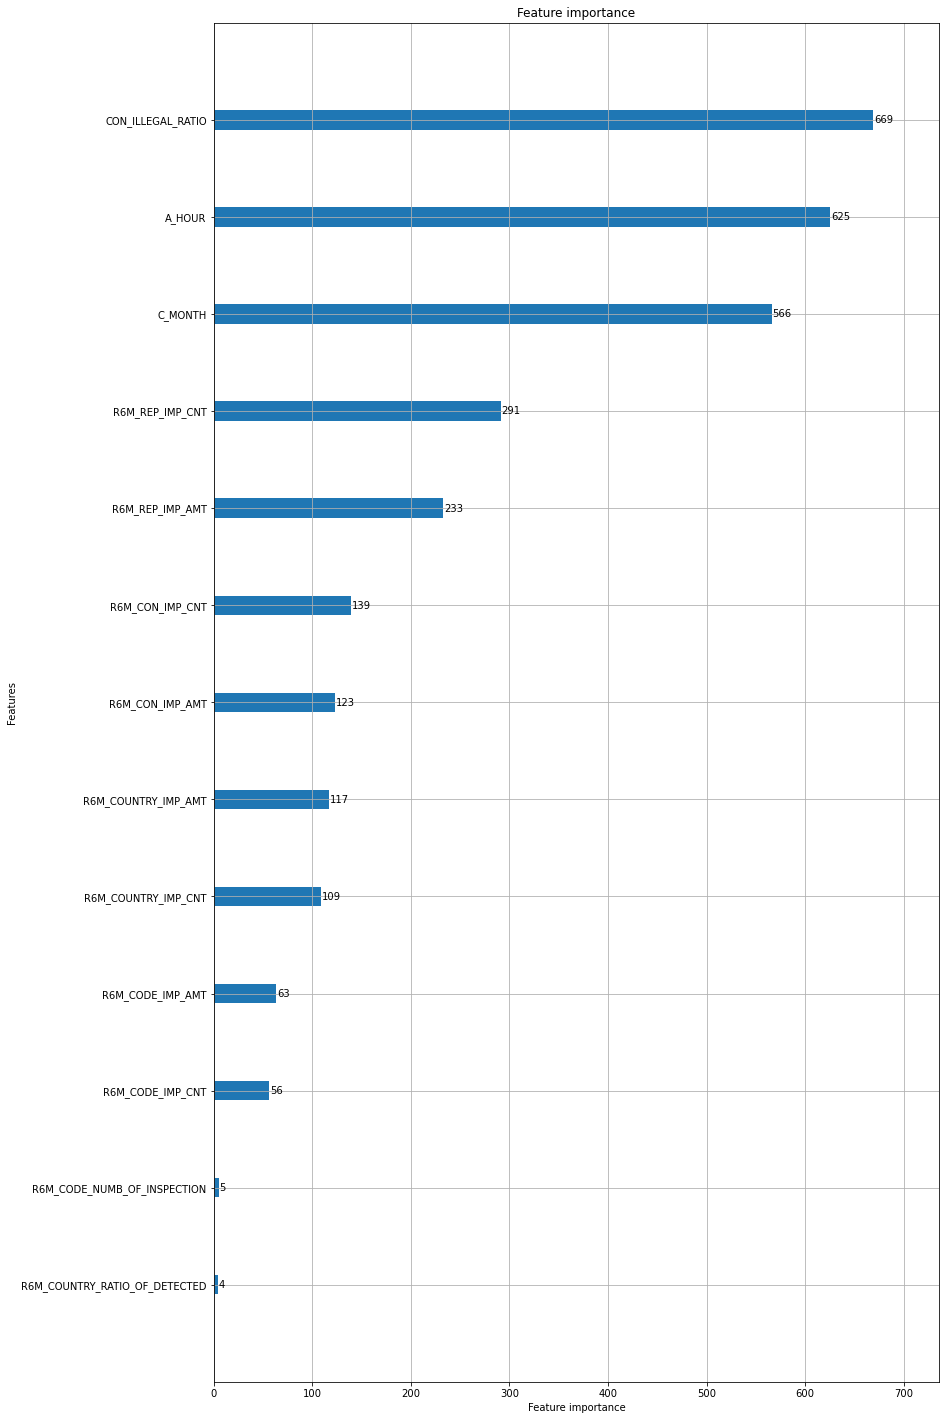

In [5]:
en = Encoder(df)
le_df = en.label()
al_l = Algorithm(le_df)
al_l.LGBM()

## LightGBM : One-hot Encoding

[1]	valid_0's binary_logloss: 0.599756
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.523288
[3]	valid_0's binary_logloss: 0.459517
[4]	valid_0's binary_logloss: 0.405612
[5]	valid_0's binary_logloss: 0.359601
[6]	valid_0's binary_logloss: 0.319946
[7]	valid_0's binary_logloss: 0.285568
[8]	valid_0's binary_logloss: 0.255564
[9]	valid_0's binary_logloss: 0.229293
[10]	valid_0's binary_logloss: 0.206214
[11]	valid_0's binary_logloss: 0.185794
[12]	valid_0's binary_logloss: 0.167772
[13]	valid_0's binary_logloss: 0.151755
[14]	valid_0's binary_logloss: 0.137487
[15]	valid_0's binary_logloss: 0.12478
[16]	valid_0's binary_logloss: 0.113473
[17]	valid_0's binary_logloss: 0.103357
[18]	valid_0's binary_logloss: 0.0942574
[19]	valid_0's binary_logloss: 0.0861436
[20]	valid_0's binary_logloss: 0.0788752
[21]	valid_0's binary_logloss: 0.0723058
[22]	valid_0's binary_logloss: 0.0663599
[23]	valid_0's binary_logloss: 0.0610652
[24]	valid_0's binary_l

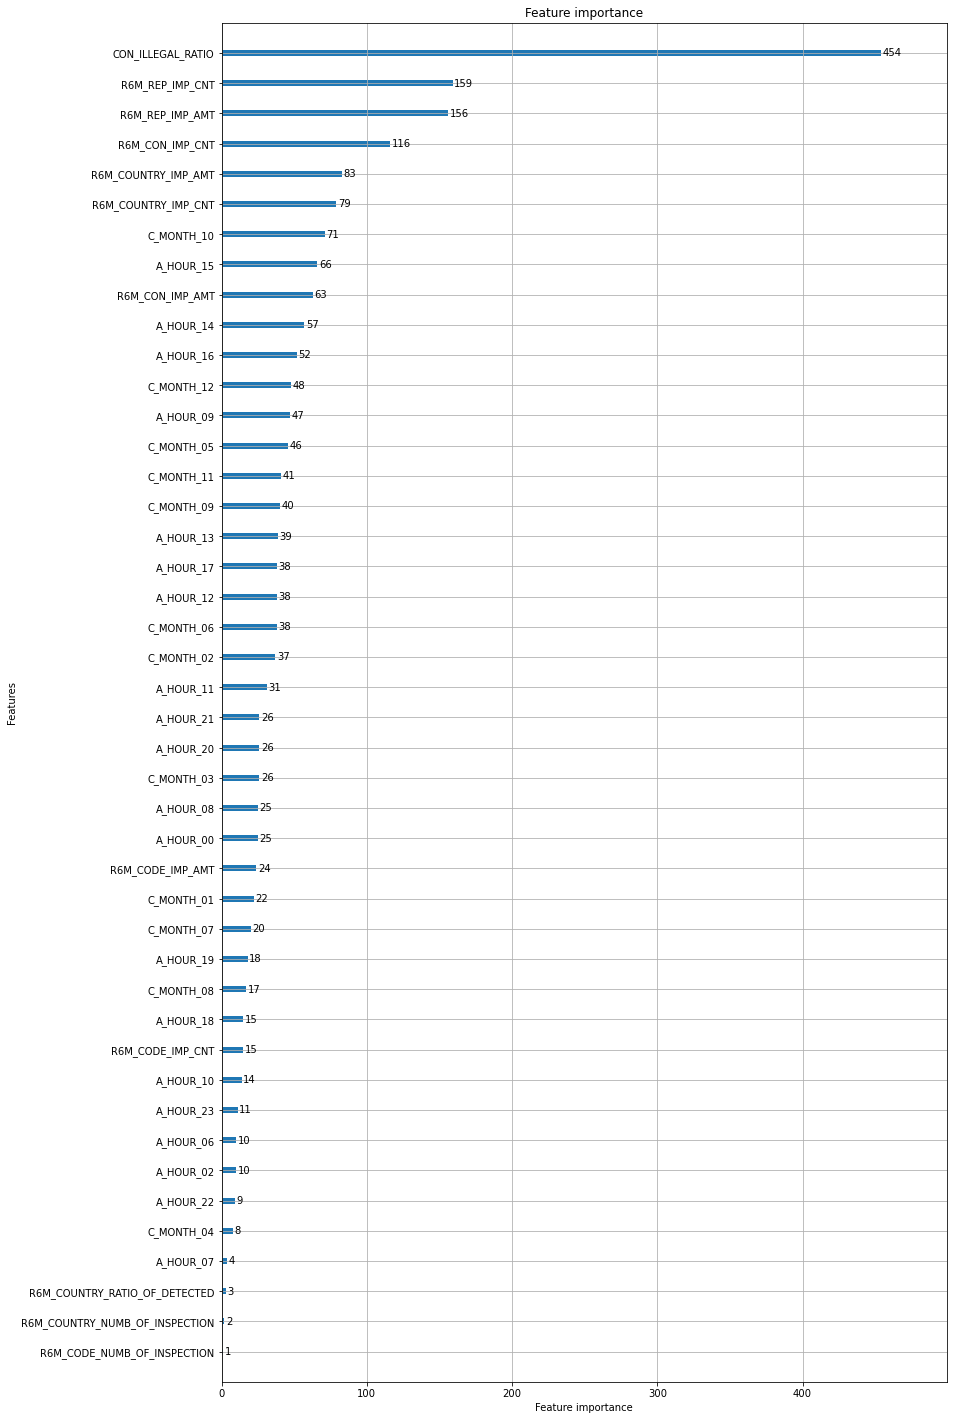

In [6]:
oh_df = en.one_hot()
al_o = Algorithm(oh_df)
al_o.LGBM()

## CatBoost

Learning rate set to 0.5
0:	learn: 0.0648899	total: 665ms	remaining: 1m 5s
1:	learn: 0.0267736	total: 1.22s	remaining: 59.7s
2:	learn: 0.0236185	total: 1.77s	remaining: 57.3s
3:	learn: 0.0195885	total: 2.32s	remaining: 55.7s
4:	learn: 0.0190943	total: 2.89s	remaining: 55s
5:	learn: 0.0175669	total: 3.48s	remaining: 54.5s
6:	learn: 0.0168779	total: 4.09s	remaining: 54.4s
7:	learn: 0.0164706	total: 4.67s	remaining: 53.7s
8:	learn: 0.0160265	total: 5.26s	remaining: 53.1s
9:	learn: 0.0157145	total: 5.87s	remaining: 52.9s
10:	learn: 0.0155836	total: 6.46s	remaining: 52.3s
11:	learn: 0.0149586	total: 7.04s	remaining: 51.6s
12:	learn: 0.0147898	total: 7.58s	remaining: 50.7s
13:	learn: 0.0144828	total: 8.15s	remaining: 50.1s
14:	learn: 0.0141582	total: 8.77s	remaining: 49.7s
15:	learn: 0.0138349	total: 9.4s	remaining: 49.4s
16:	learn: 0.0133615	total: 10s	remaining: 49s
17:	learn: 0.0129156	total: 10.6s	remaining: 48.5s
18:	learn: 0.0127056	total: 11.3s	remaining: 48.1s
19:	learn: 0.0125049	to

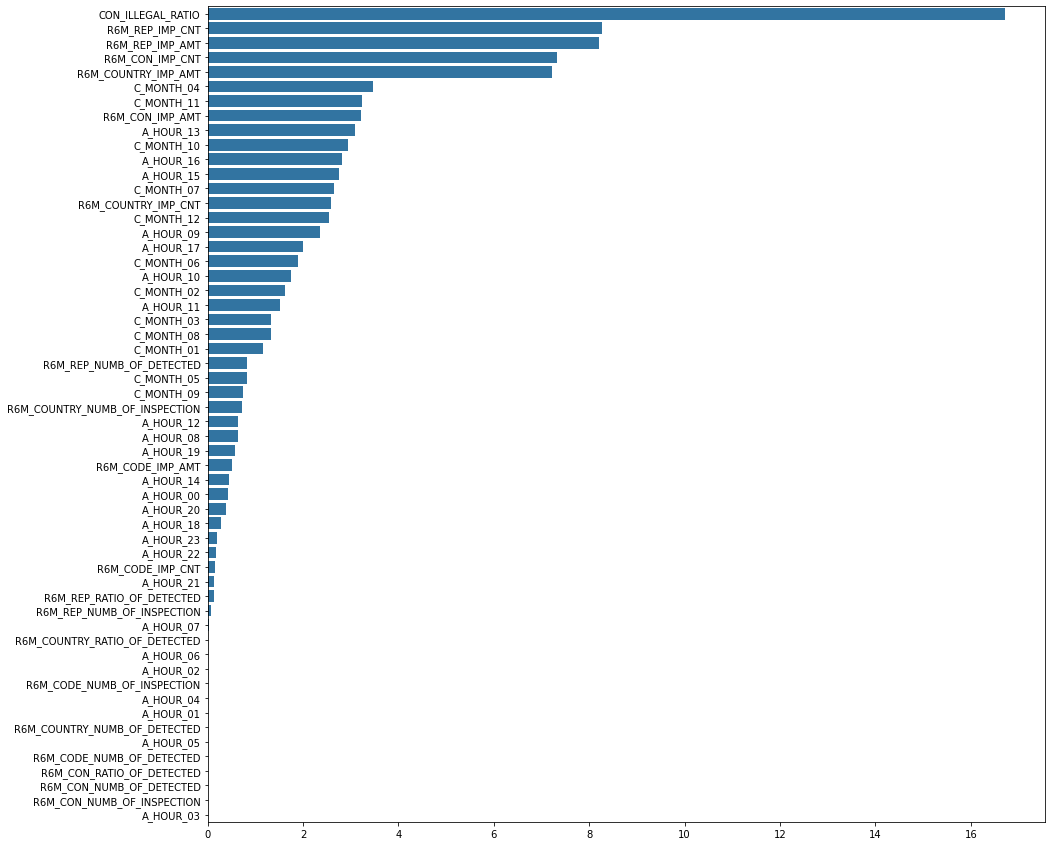

In [8]:
al_o.catboost()

## MLP

In [9]:
al_o.MLP()

Confusion Matrix
[[426368    142]
 [   749   2043]]
Accuracy : 0.9979
Precision : 0.9350
Recall : 0.7317
f1 score : 0.8210
time : 1037.7869266039997


## Random Forest

Confusion Matrix
[[426290    220]
 [   234   2558]]
Accuracy : 0.9989
Precision : 0.9208
Recall : 0.9162
f1 score : 0.9185
time : 361.66147500500006


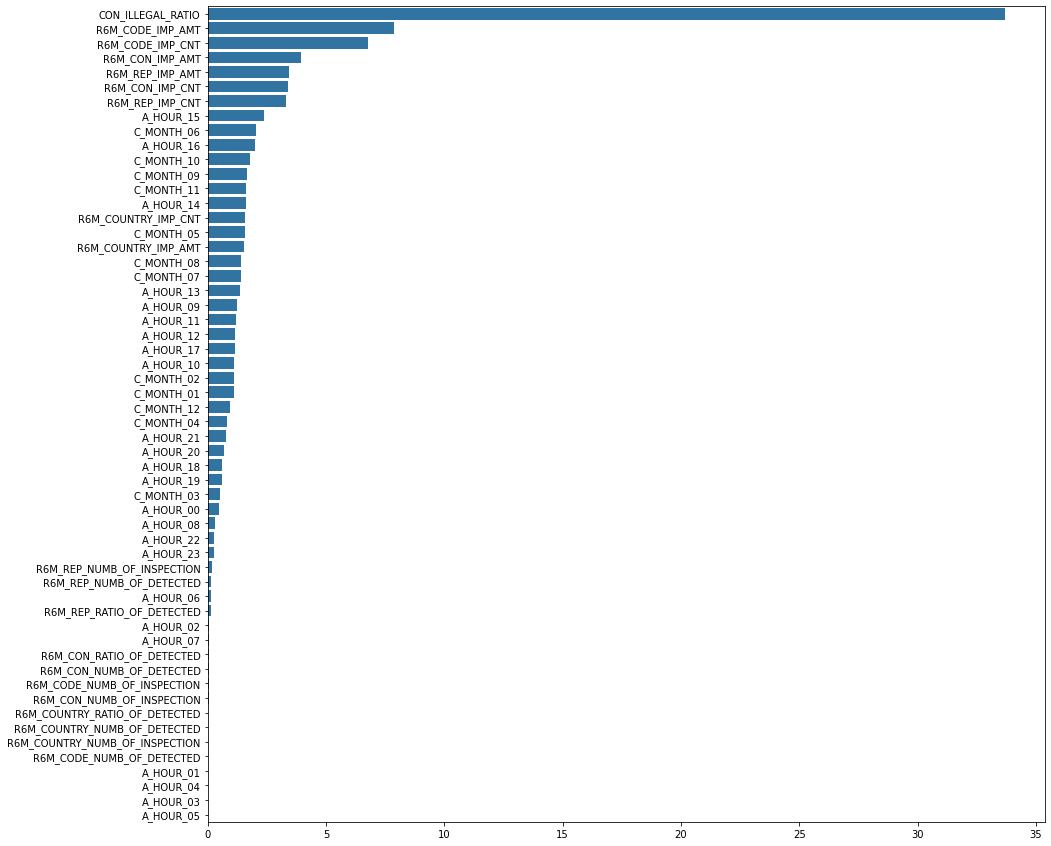

In [10]:
al_o.RF()